<a href="https://colab.research.google.com/github/rapha18th/AgroSearch/blob/master/Maize_Plant_Disease_Detection_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maize Plant Disease Detection Starter Notebook

## AI for Crop Health - Diagnosing Maize Plant Diseases in Zimbabwe Using Deep Learning

### 📌 About the Challenge
Maize is the staple crop that sustains millions of Zimbabweans, underpinning both food security and livelihoods across rural and urban communities. Yet, Zimbabwe’s maize production is persistently threatened by several devastating leaf diseases—primarily **Common Rust**, **Gray Leaf Spot**, and **Blight**—which cause significant yield reductions and economic losses.

These diseases are widespread across Zimbabwe’s diverse agro-ecological zones, including:
- High-rainfall areas like **Mashonaland East** and **Manicaland**.
- Drier regions like **Masvingo**.
- The central **Midlands**.

Their impact is exacerbated by limited access to timely and accurate disease diagnostics, especially for smallholder farmers who form the backbone of Zimbabwe’s agriculture.

### Your Task
Develop **deep learning models** that can accurately detect and classify maize diseases from leaf images. Leveraging AI for early and precise disease identification can transform farming practices by:
- Providing farmers with **real-time, accessible tools** to identify diseases before they spread widely.
- Reducing reliance on **manual inspection**, which is often subjective and slow.
- Enabling **targeted interventions** to minimize crop loss and reduce pesticide overuse.
- Contributing to **improved food security** and agricultural sustainability in Zimbabwe.

### Dataset Overview
The dataset includes images of maize leaves categorized into:
1. **Common Rust**
2. **Gray Leaf Spot**
3. **Blight**
4. **Healthy**

Your challenge is to design and train models robust to diverse field conditions (e.g., varying lighting, leaf angles, and disease severity).

### Impact
By addressing this challenge, you will contribute to a **high-impact solution** with direct applications in Zimbabwe’s farming communities and beyond, driving the adoption of AI-powered precision agriculture in sub-Saharan Africa.


## 📊 Evaluation
- **Metrics**: Accuracy, Precision, Recall, F1-Score.
- **Leaderboard**: Based on performance on the evaluation set.

## 🏆 Prizes
 - **Top 3 performers** will receive:
    - **First Prize**: $250 USD + Certificate
    - **Second Prize**: $150 USD + Certificate
    - **Third Prize**: $100 USD + Certificate
 - **Performers ranked 4-20** will receive:
    - Certificate with ranking
     

## ⏳ Timeline
- **Registration Date**: 19 - 25 July 2025
- **Start Date**: 26 July 2025
- **Submission Deadline**: 1 August 2025
- **Results Announcement**: 8 August 2025

## 📜 Rules
- This challenge is **only open to the Deep Learning Indaba X Zimbabwe Community**.
- Teams must adhere to the **code of conduct** and **submission guidelines**.

## 📂About the Data

The dataset contains labelled images of crop leaves, categorized into four classes:

  | Class          | Training Images | Validation Images | Test Images | Total Images |
  |----------------|------------------|-------------|-------------------|--------------|
  | Common Rust    | 914              | 197         | -                 | 1,111        |
  | Gray Leaf Spot | 401              | 87          | -                 | 488          |
  | Blight         | 802              | 173         | -                 | 975          |
  | Healthy        | 813              | 175         | -                 | 988          |
  | Unlabeled      | -                | -           | 626               | 626          |
  | **Total**      | **2,930**        | **632**     | **626**           | **4,188**    |





# 🌱 Starter Notebook:  Maize Plant Disease Detection

## 📌 Overview
This notebook serves as a **starter template** for the *AI for Crop Health* hackathon challenge. It provides a foundational workflow for loading, preprocessing, and analyzing the maize disease dataset, as well as training a baseline deep learning model. Use this as a jumping-off point to build and refine your solution.


## 🎯 Objectives
By the end of this notebook, you will:
1. **Explore the dataset**: Visualize sample images and understand class distributions.
2. **Preprocess data**: Resize, normalize, and augment images for model training.
3. **Train a baseline model**: Implement a simple CNN
4. **Evaluate performance**: Calculate metrics (accuracy, F1-score) and identify areas for improvement.



## **Importing Libraries**

In [ ]:
import os

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchinfo
import torchvision
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,classification_report
from tqdm import tqdm
from torch.utils.data import DataLoader, random_split
from torchinfo import summary
from torchvision import datasets, transforms
#!jupyter nbconvert --to html "Maize_Plant_Disease_Detection_Starter_Notebook.ipynb"

In [ ]:
# Check for available hardware acceleration and set device accordingly
# CUDA enables GPU acceleration for NVIDIA GPUs, significantly speeding up deep learning computations
# MPS (Metal Performance Shaders) provides GPU acceleration for Apple Silicon chips (M1/M2)
# If neither is available, fall back to CPU (slower but always available)

if torch.cuda.is_available():
    device = "cuda"  # Use NVIDIA GPU if available
elif torch.backends.mps.is_available():
    device = "mps"   # Use Apple GPU if available
else:
    device = "cpu"   # Default to CPU if no accelerators found


## **Exploring and Preparing Our Data**

In [ ]:
# Define paths to training and val data directories
# Using os.path.join() ensures cross-platform compatibility for path construction
train_data_dir = os.path.join("crop pictures", "train")  # Path to training data
val_data_dir = os.path.join("crop pictures", "val")    # Path to val data

# Print the paths for verification and debugging purposes
print("Training Data Directory:", train_data_dir)  # Show training data path
print("val Data Directory:", val_data_dir)       # Show val data path

Training Data Directory: crop pictures\train
val Data Directory: crop pictures\val


In [ ]:
#Create and print a list of class names in our directory
classes = os.listdir(train_data_dir)

print("List of classes:", classes)


List of classes: ['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']


In [ ]:
# Count number of images in each class for train and val sets
train_counts = {}
val_counts = {}

for class_name in classes:
    train_class_dir = os.path.join(train_data_dir, class_name)
    val_class_dir = os.path.join(val_data_dir, class_name)

    train_counts[class_name] = len(os.listdir(train_class_dir))
    val_counts[class_name] = len(os.listdir(val_class_dir))

print("Training set counts:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count} images")

print("\nValidation set counts:")
for class_name, count in val_counts.items():
    print(f"{class_name}: {count} images")


Training set counts:
Blight: 802 images
Common_Rust: 914 images
Gray_Leaf_Spot: 401 images
Healthy: 813 images

Validation set counts:
Blight: 173 images
Common_Rust: 197 images
Gray_Leaf_Spot: 87 images
Healthy: 175 images


## **Image Preprocessing**

In [ ]:
# Convert grayscale images to RGB format since our model expects 3-channel input
# Grayscale images only have 1 channel, which would cause dimension mismatch errors
# This ensures all images have consistent 3-channel RGB format for model training
def convert_to_rgb(img):
    """Convert PIL image to RGB format if it isn't already.

    Args:
        img: PIL Image object

    Returns:
        PIL Image object in RGB format
    """
    if img.mode != "RGB":
        img = img.convert("RGB")
    return img

In [ ]:
# Resize images to 224x224 to ensure consistent input dimensions for the model (common size for CNNs)
# Convert images to tensors to enable GPU acceleration and matrix operations
# First create a basic transform to get images to tensor format for mean/std calculation


# Final transform
transform = transforms.Compose([
    transforms.Lambda(convert_to_rgb),  # First convert to RGB if needed
    transforms.Resize((224, 224)),      # Resize to 224x224
    transforms.ToTensor(),              # Convert to tensor
])


print(type(transform))
print("-----------------")
print(transform)

<class 'torchvision.transforms.transforms.Compose'>
-----------------
Compose(
    Lambda()
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
# Create training and validation datasets using ImageFolder with the defined transform
# Using ImageFolder to automatically load and organize image data from directory structure
# The transform will be applied to each image (conversion to RGB, resizing, and tensor conversion)
training_dataset = datasets.ImageFolder(train_data_dir, transform)  # Training data with transformations
val_dataset = datasets.ImageFolder(val_data_dir, transform)        # Validation data with same transformations

# Print dataset sizes to verify data loading and ensure proper train/val split
print('Length of training dataset:', len(training_dataset))  # Shows number of training samples
print('Length of validation dataset:', len(val_dataset))     # Shows number of validation samples

Length of training dataset: 2930
Length of validation dataset: 632


Computing class counts for training data...
Training data counts:
Blight            802
Common_Rust       914
Gray_Leaf_Spot    401
Healthy           813
dtype: int64

Computing class counts for val data...
Validation data counts:
Blight            173
Common_Rust       197
Gray_Leaf_Spot     87
Healthy           175
dtype: int64


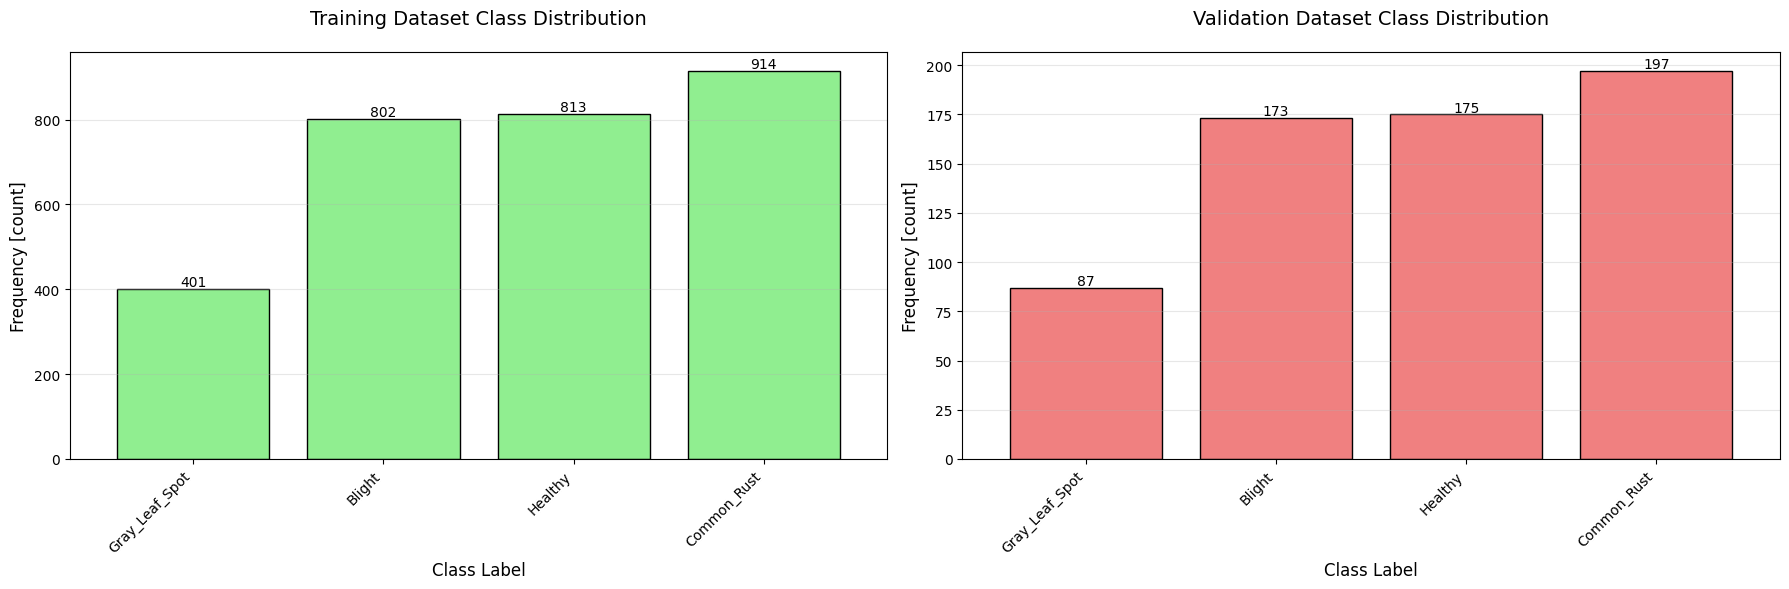

In [ ]:
# This section analyzes and visualizes the class distribution in our training and validation datasets

# Function to count instances of each class in a dataset
def class_counts(dataset):
    """Counts the number of samples per class in a dataset.

    Args:
        dataset: A PyTorch Dataset object with class labels

    Returns:
        A pandas Series with class names as index and counts as values
    """
    counts = {}
    for _, label in dataset:
        class_name = dataset.classes[label]  # Get class name from label index
        counts[class_name] = counts.get(class_name, 0) + 1  # Increment count
    return pd.Series(counts)

# Calculate and display class counts for both datasets
print("Computing class counts for training data...")
train_counts = class_counts(training_dataset)
print("Training data counts:")
print(train_counts)
print("\nComputing class counts for val data...")
val_counts = class_counts(val_dataset)
print("Validation data counts:")
print(val_counts)

# Create visualization comparing class distributions
plt.figure(figsize=(18, 6))  # Set figure size

# Training data distribution plot
plt.subplot(1, 2, 1)  # First subplot
ax1 = train_counts.sort_values().plot(
    kind='bar',
    color='lightgreen',
    edgecolor='black',
    width=0.8
)
# Add count labels above bars
for p in ax1.patches:
    ax1.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Frequency [count]", fontsize=12)
plt.title("Training Dataset Class Distribution", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', alpha=0.3)  # Add light grid lines

# Validation data distribution plot
plt.subplot(1, 2, 2)  # Second subplot
ax2 = val_counts.sort_values().plot(
    kind='bar',
    color='lightcoral',
    edgecolor='black',
    width=0.8
)
# Add count labels above bars
for p in ax2.patches:
    ax2.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Class Label", fontsize=12)
plt.ylabel("Frequency [count]", fontsize=12)
plt.title("Validation Dataset Class Distribution", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(axis='y', alpha=0.3)  # Add light grid lines

plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Display the figure

In [ ]:
# Set batch size for data loading
batch_size = 32

# Create training data loader with shuffling for better training
train_loader = DataLoader(training_dataset, batch_size, shuffle=True)

# Create validation data loader without shuffling for consistent evaluation
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)

# Print types of the created data loaders
print(type(train_loader))
print(type(val_loader))

<class 'torch.utils.data.dataloader.DataLoader'>
<class 'torch.utils.data.dataloader.DataLoader'>


In [ ]:
# Get first batch of training data to inspect shapes
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Print image batch shape (batch_size, channels, height, width)
print(f"Image batch shape: {images.shape} (batch_size, channels, height, width)")

# Print label batch shape (batch_size,)
print(f"Label batch shape: {labels.shape} (batch_size,)")

Image batch shape: torch.Size([32, 3, 224, 224]) (batch_size, channels, height, width)
Label batch shape: torch.Size([32]) (batch_size,)


## Model Building -Simple Convolutional Neural Network

In [ ]:
# Basic CNN model - you can modify this architecture to better suit your needs
# Consider adding more layers, changing channel sizes, or using different activation functions
model = torch.nn.Sequential(
    # First convolutional block
    nn.Conv2d(3, 8, kernel_size=3, padding=1),  # Input channels=3 (RGB), output=8
    nn.ReLU(),
    nn.MaxPool2d(2, 2),  # Reduces spatial dimensions by half

    # Flatten and output layer
    nn.Flatten(),  # Prepares features for dense layer
    nn.Linear(8 * 112 * 112, 4)  # Output layer with 4 classes (diseases + healthy)
)
print(model)


Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=100352, out_features=4, bias=True)
)


## Training Our Model

In [ ]:
# Initialize loss function - CrossEntropyLoss is suitable for multi-class classification
# This will measure how well our model's predictions match the true disease labels
loss_fn = nn.CrossEntropyLoss()

# Set up Adam optimizer with learning rate 0.01 to update model parameters during training
# Adam is an adaptive optimizer that adjusts learning rates per-parameter
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Print details of our training configuration
print("Training Configuration:")
print(f"Loss Function: {loss_fn}")
print("----------------------")
print(f"Optimizer: {optimizer} (Learning Rate: 0.01)")

Training Configuration:
Loss Function: CrossEntropyLoss()
----------------------
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
) (Learning Rate: 0.01)


In [ ]:
# Define input dimensions for the model summary
height = 224  # Height of input images in pixels
width = 224   # Width of input images in pixels

# Generate model summary showing:
# - Layer architecture
# - Output shapes
# - Parameter counts
# - Memory usage
# Input size format: (batch_size, channels, height, width)
summary(model, input_size=(batch_size, 3, height, width))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [32, 4]                   --
├─Conv2d: 1-1                            [32, 8, 224, 224]         224
├─ReLU: 1-2                              [32, 8, 224, 224]         --
├─MaxPool2d: 1-3                         [32, 8, 112, 112]         --
├─Flatten: 1-4                           [32, 100352]              --
├─Linear: 1-5                            [32, 4]                   401,412
Total params: 401,636
Trainable params: 401,636
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 372.51
Input size (MB): 19.27
Forward/backward pass size (MB): 102.76
Params size (MB): 1.61
Estimated Total Size (MB): 123.64

In [ ]:
def train(
    model,
    optimizer,
    loss_fn,
    train_loader,
    val_loader,
    epochs=5,
    device='cpu',
    use_train_accuracy=True,
):
    """Train a PyTorch model and validate its performance.

    Args:
        model: The neural network model to train
        optimizer: Optimization algorithm (e.g., Adam)
        loss_fn: Loss function (e.g., CrossEntropyLoss)
        train_loader: DataLoader for training data
        val_loader: DataLoader for validation data
        epochs: Number of training iterations (default: 5)
        device: Device to train on ('cpu' or 'cuda')
        use_train_accuracy: Whether to compute training accuracy (default: True)

    Returns:
        Tuple of lists containing training/validation losses and accuracies
    """
    # Move model to specified device (CPU/GPU)
    model.to(device)

    # Initialize lists to track performance metrics
    train_losses = []  # Training loss per epoch
    val_losses = []    # Validation loss per epoch
    train_accuracies = []  # Training accuracy per epoch
    val_accuracies = []    # Validation accuracy per epoch

    # Training loop over specified number of epochs
    for epoch in range(epochs):
        # --- TRAINING PHASE ---
        model.train()  # Set model to training mode
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        # Iterate over training batches
        for inputs, labels in train_loader:
            # Move data to device
            inputs, labels = inputs.to(device), labels.to(device)

            # Reset gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            # Calculate loss
            loss = loss_fn(outputs, labels)
            # Backward pass (compute gradients)
            loss.backward()
            # Update weights
            optimizer.step()

            # Accumulate loss
            train_loss += loss.item()

            # Calculate training accuracy if enabled
            if use_train_accuracy:
                _, predicted = torch.max(outputs.data, 1)  # Get predicted class
                total_train += labels.size(0)  # Total samples in batch
                correct_train += (predicted == labels).sum().item()  # Correct predictions

        # --- VALIDATION PHASE ---
        model.eval()  # Set model to evaluation mode
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        # Disable gradient calculation for validation
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                # Calculate loss
                loss = loss_fn(outputs, labels)
                val_loss += loss.item()

                # Calculate validation accuracy
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        # --- METRICS CALCULATION ---
        # Average losses over all batches
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        # Calculate accuracies (percentage)
        if use_train_accuracy:
            train_acc = 100 * correct_train / total_train
            train_accuracies.append(train_acc)
        val_acc = 100 * correct_val / total_val
        val_accuracies.append(val_acc)

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{epochs}')
        print(f'Train Loss: {train_loss:.4f}', end=' ')
        if use_train_accuracy:
            print(f'- Train Acc: {train_acc:.2f}%', end=' ')
        print(f'- Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.2f}%')

    return train_losses, val_losses, train_accuracies, val_accuracies

# Execute training with default 5 epochs
train_losses, val_losses, train_accuracies, val_accuracies = train(
    model, optimizer, loss_fn, train_loader, val_loader, epochs=5
)


Epoch 1/5
Train Loss: 2.4906 - Train Acc: 55.02% - Val Loss: 0.8685 - Val Acc: 56.33%
Epoch 2/5
Train Loss: 0.8712 - Train Acc: 55.60% - Val Loss: 0.8346 - Val Acc: 56.33%
Epoch 3/5
Train Loss: 0.8518 - Train Acc: 55.94% - Val Loss: 0.8266 - Val Acc: 57.12%
Epoch 4/5
Train Loss: 0.8396 - Train Acc: 56.21% - Val Loss: 0.8309 - Val Acc: 57.44%
Epoch 5/5
Train Loss: 0.8317 - Train Acc: 56.31% - Val Loss: 0.8332 - Val Acc: 57.12%


### **Model Evalutions**

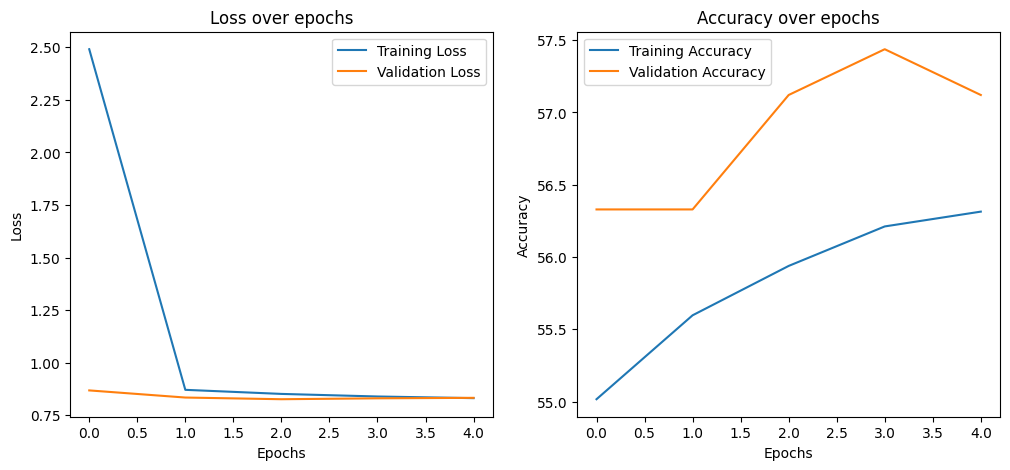

In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

### Overall Assessment
**Overfitting**: The graphs indicate a significant divergence between training and validation metrics, suggesting potential overfitting. The model shows strong performance on the training data, but validation accuracy plateaus while training accuracy continues to improve.

### Next Steps:
1. **Regularization**: Implement techniques such as dropout or L2 regularization to help mitigate overfitting.
2. **Data Augmentation**: Introduce data augmentation strategies to enhance the diversity of the training dataset, which may improve generalization.
3. **Early Stopping**: Consider using early stopping based on validation loss to halt training when performance on the validation set begins to degrade.
4. **Hyperparameter Tuning**: Explore different learning rates, batch sizes, and model architectures to optimize performance.


In [ ]:
# Predict function - gets probabilities for each class
def predict(model, data_loader):
    model.eval()  # Set model to evaluation mode
    all_probs = []  # Store all probabilities

    # No gradient calculation needed for prediction
    with torch.no_grad():
        for images, _ in data_loader:  # Iterate through data loader
            outputs = model(images)  # Get model outputs
            probs = torch.softmax(outputs, dim=1)  # Convert to probabilities
            all_probs.append(probs)  # Append batch probabilities

    return torch.cat(all_probs, dim=0)  # Concatenate all batch probabilities

# Get validation set probabilities and predictions
probabilities_val = predict(model, val_loader)
predictions_val = torch.argmax(probabilities_val, dim=1)  # Get class with highest probability

print(predictions_val)  # Print predicted classes

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 2, 0, 3,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Get validation set labels by concatenating all labels from the validation loader
targets_val = torch.cat(
    [labels for _, labels in tqdm(val_loader, desc="Get Labels")]
)

Get Labels: 100%|██████████| 20/20 [00:02<00:00,  7.03it/s]


<Figure size 1000x800 with 0 Axes>

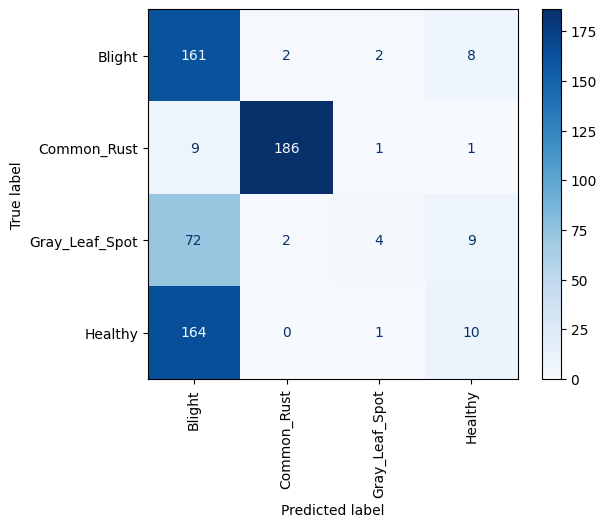

In [ ]:
# Compute confusion matrix between true labels and predicted labels
# Move tensors to CPU first if they're on GPU
cm = confusion_matrix(targets_val.cpu(), predictions_val.cpu())

# Create ConfusionMatrixDisplay object with the matrix and class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Set figure size for better visualization
plt.figure(figsize=(10, 8))

# Plot confusion matrix with blue color map and vertical x-axis labels
disp.plot(cmap=plt.cm.Blues, xticks_rotation="vertical")

# Display the plot
plt.show()

In [ ]:
# Generate classification report
report = classification_report(targets_val.cpu(), predictions_val.cpu(), target_names=classes)
print(report)


                precision    recall  f1-score   support

        Blight       0.40      0.93      0.56       173
   Common_Rust       0.98      0.94      0.96       197
Gray_Leaf_Spot       0.50      0.05      0.08        87
       Healthy       0.36      0.06      0.10       175

      accuracy                           0.57       632
     macro avg       0.56      0.49      0.43       632
  weighted avg       0.58      0.57      0.49       632



## Submission to Hackathon

In [ ]:
# Define the directory for test images
test_dir = os.path.join('crop pictures', 'test')

# Print the test directory path
print(test_dir)

crop pictures\test


In [ ]:
# Define a function to get the confidence scores for a given image file
def file_to_confidence(model, datadir, filename, transform_pipeline):
    # Construct the full file path for the image
    file_path = os.path.join(datadir, filename)
    # Open the image file
    image = PIL.Image.open(file_path)
    # Apply the transformation pipeline to the image
    transformed = transform_pipeline(image)
    # Add a batch dimension to the transformed image
    unsqueezed = transformed.unsqueeze(0)
    # Move the image tensor to the appropriate device (CPU or GPU)
    image_cuda = unsqueezed.to(device)

    # Set the model to evaluation mode
    model.eval()
    # Disable gradient calculation for inference
    with torch.no_grad():
        # Get the raw output from the model
        model_raw = model(image_cuda)
        # Apply softmax to get confidence scores for each class
        confidence = torch.nn.functional.softmax(model_raw, dim=1)

    # Create a DataFrame to store the filename and confidence scores
    conf_df = pd.DataFrame([[filename] + confidence.tolist()[0]])
    # Set the column names to include the image ID and class names
    conf_df.columns = ["ID"] + training_dataset.classes

    # Return the DataFrame containing the confidence scores
    return conf_df

In [ ]:
# This section retrieves the directory of blight training images and gets the confidence score for a specific image.
blight_train_dir = os.path.join('crop pictures','train','blight')
blight_images = os.listdir(blight_train_dir)

file_to_confidence(model, blight_train_dir, blight_images[7], transform)

,ID,Blight,Common_Rust,Gray_Leaf_Spot,Healthy
0,Corn_Blight (1007).JPG,0.388124,0.041584,0.191571,0.378722


In [ ]:
# Convert scientific notation to standard decimals
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Final prediction to hackathon
small_dfs = []

for filename in tqdm(os.listdir(test_dir), desc="Predicting on test set"):
    small_dfs.append(
        file_to_confidence(model, test_dir, filename, transform)
    )

confidence_df = pd.concat(small_dfs)

# Remove file extension from ID column
confidence_df['ID'] = confidence_df['ID'].str.split('.').str[0]

confidence_df = confidence_df.sort_values("ID").reset_index(drop=True)
confidence_df.head()

Predicting on test set: 100%|██████████| 626/626 [00:05<00:00, 113.96it/s]


,ID,Blight,Common_Rust,Gray_Leaf_Spot,Healthy
0,image_000001,0.37963,0.04334,0.20206,0.37496
1,image_000002,0.38812,0.04158,0.19157,0.37872
2,image_000003,0.00000,1.00000,0.00000,0.00000
3,image_000004,0.37910,0.04234,0.20124,0.37732
4,image_000005,0.38812,0.04158,0.19157,0.37872


In [ ]:
confidence_df.to_csv("submission.csv", index=False)


 ## 🎉 Thank You for Participating! 🎉
  
- A huge thank you to all participants who joined us for this exciting hackathon representing **Deep Learning Indaba X Zimbabwe 2025: From Ground to Cloud - Powering Zimbabwe's future with innovative AI solutions**! 🙌  
  
- Your dedication, creativity, and hard work in developing AI solutions for agriculture made this event truly special. We hope you enjoyed the challenges and learned valuable skills in applying deep learning techniques to real-world agricultural problems. 💡
  
- For any inquiries, questions, or feedback, please don't hesitate to reach out:  


 **Shannon Tafadzwa Sikadi**  
 *AI Hackathon Lead & Co-organizer*  
 *Deep Learning Indaba X Zimbabwe*  
📧 shannon@indabaxzimbabwe.com | info@indabaxzimbabwe.com


 Keep innovating and pushing boundaries! 🚀  
 Until next time! 👋


